## Parcial 4 (80%).

### Lea las siguientes instrucciones y resuelva el parcial.



*   Lea cada numeral que se encuentra a continuación. Resuelva utilizando este notebook
*   El parcial debe enviarse haciendo uso de git. No se reciben archivos de otra forma. Tenga en cuenta que se debe subir usando git bash y no cargar desde la web, los archivos que se suban desde la web serán descartados.



### Punto 1

Utilice programación orientada a objetos POO para crear un sistema o máquina de la siguiente forma.



*   El sistema tiene 3 luces, una roja para las alarmas, una verde para el funcionamiento y una amarilla para las alertas.
*   El sistema tiene un sensor de presión en bares, un sensor de tensión eléctrica en voltios y un sensor de velocidad en RPMs.
*   El sistema muestra alertas con la luz amarilla si hay algún sensor fuera del rango de operación. Esto es, de 0 a 10 bares, de 120 a 240 voltios y de 8 a 12 RPMs.
*   El sistema muestra alarma si hay 2 sensores o más fuera del rango de operación.
*   Las RPMs vienen de un motor que depende de la corriente para modificar su velocidad, esta corriente a su vez depende del voltaje sabiendo que la potencia es un valor fijo que ud seleccionará. Recuerde que P = V.I.
*   Al incio las variables de operación deben iniciar en un valor dentro del rango, se da un start para inciar el proceso y se debe simular el funcionamiento del sistema con variables aleatorias para los sensores y corriente del motor. Además se debe mostrar los tiempos de alerta, alarma y funcionamiento del motor con un método de mostrar_informacion().
* Utilice al menos 4 métodos.



### Punto 2

Utilice la base de datos de NBA para realizar:

* Un filtrado básico de los datos eliminando datos faltantes, datos atípicos, haciendo descripción de estadísticas básicas
* Al menos 5 gráficas diferentes informativas (al menos 3 tipos diferentes de gráficas y puede combinar con las variables a usar). Usted selecciona las variables de interés y lo que desea analizar.




### Punto 3

Utilice la carpeta audios para:

* Cargar los audios y graficar las ondas en un gráfica con múltiples plots.
* Mostrar el espectrograma de cada audio usando múltiples plots.
* Tratar de filtrar en el audio más largo que es de una finca de animales algún sonido particular de algún animal.

# Solución punto 1


In [106]:
import random
import time

Definimos metodo 1 para inicializar sensores

In [108]:
class Sensor:
    def __init__(self, nombre, rango_min, rango_max):
        self.nombre = nombre
        self.rango_min = rango_min
        self.rango_max = rango_max
        self.valor = random.uniform(rango_min, rango_max)

    def actualizar_valor(self):
        self.valor = random.uniform(-100, 200)

Metodo 2 para inicializar las luces

In [110]:
class Luz:
    def __init__(self, color):
        self.color = color
        self.encendida = False

    def encender(self):
        self.encendida = True

    def apagar(self):
        self.encendida = False

Metodo 3 para calcular y actualizar la corriente

In [111]:
class Motor:
    def __init__(self, voltaje):
        self.voltaje = voltaje
        self.potencia = 0

    def calcular_corriente(self):
        if self.potencia is not None:
            if self.voltaje != 0:
                return round(random.uniform(0, self.potencia / self.voltaje), 1)
            else:
                return None
        else:
            return None

inicializaciòn de sensores, configuracion de potencia (inicial), condicionales y mostrar información

In [112]:
class Sistema:
    def __init__(self):
        self.sensor_presion = Sensor('Presión', 0, 10)
        self.sensor_tension = Sensor('Tensión', 120, 240)
        self.sensor_velocidad = Sensor('Velocidad', 8, 12)
        self.luz_roja = Luz('Roja')
        self.luz_verde = Luz('Verde')
        self.luz_amarilla = Luz('Amarilla')
        self.motor = None

    def configurar_potencia(self):
        while True:
            try:
                potencia = float(input('Ingresa la potencia del motor: '))
                self.motor = Motor(self.sensor_tension.valor)
                self.motor.potencia = potencia
                break
            except ValueError as e:
                print(e)

    def iniciar_proceso(self):
        self.configurar_potencia()

        self.sensor_presion.actualizar_valor()
        self.sensor_tension.actualizar_valor()
        self.sensor_velocidad.actualizar_valor()

        while True:
            self.sensor_presion.actualizar_valor()
            self.sensor_tension.actualizar_valor()
            self.sensor_velocidad.actualizar_valor()

            if self.sensor_presion.valor < 0 or self.sensor_presion.valor > 10 or \
               self.sensor_tension.valor < 120 or self.sensor_tension.valor > 240 or \
               self.sensor_velocidad.valor < 8 or self.sensor_velocidad.valor > 12:
                self.luz_amarilla.encender()
            else:
                self.luz_amarilla.apagar()

            sensores_fuera_rango = sum(1 for sensor in [self.sensor_presion, self.sensor_tension, self.sensor_velocidad]
                                       if sensor.valor < sensor.rango_min or sensor.valor > sensor.rango_max)

            if sensores_fuera_rango >= 2:
                self.luz_roja.encender()
                self.mostrar_informacion('Alarma')
            else:
                self.luz_roja.apagar()

            self.luz_verde.encender()
            self.mostrar_informacion('Funcionamiento')
            time.sleep(1)

    def mostrar_informacion(self, estado):
        print(f'Tiempo: {time.strftime("%H:%M:%S")}, Estado: {estado}, '
              f'Presión: {self.sensor_presion.valor:.1f}, '
              f'Tensión: {self.sensor_tension.valor:.1f}, '
              f'Velocidad: {self.sensor_velocidad.valor:.1f}, '
              f'Corriente: {self.motor.calcular_corriente()}, '
              f'Luz Roja: {"Encendida" if self.luz_roja.encendida else "Apagada"}, '
              f'Luz Verde: {"Encendida" if self.luz_verde.encendida else "Apagada"}, '
              f'Luz Amarilla: {"Encendida" if self.luz_amarilla.encendida else "Apagada"}')


In [ ]:
sistema = Sistema()
sistema.iniciar_proceso()

**Solución punto 2**# Nueva sección

# Solución punto 2

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



cargamos la base

In [2]:
from google.colab import files
uploaded = files.upload()

Saving all_seasons.csv to all_seasons.csv


leemos la base

In [15]:
all_seasons= list(uploaded.keys())[0]
df = pd.read_csv(all_seasons)

Voy a realizar un filtro de los jugadores que registran undrafted para eliminarlos, esto suponiendo que es un dato primordial para el anàlisis que realizaremos.

In [ ]:
print(undrafted_players)

In [36]:
undrafted_players = df[df['draft_year'] == 'Undrafted']


In [34]:
undrafted_index = df[df['draft_year'] == 'Undrafted'].index


creamos una base llamada df_filtro que serà la que usaremos con el filtro que realizamos

In [48]:
df_filtro = df.drop(undrafted_index)


In [ ]:
print(df_filtro)


Vamos a calcular los outliers utilizando cuartiles IQR en la columna Player_Height:

In [67]:
Q1_height = df_filtro['player_height'].quantile(0.25)
Q3_height = df_filtro['player_height'].quantile(0.75)
IQR_height = Q3_height - Q1_height

In [51]:
limite_inferior = Q1_height - 1.5 * IQR_height
limite_superior = Q3_height + 1.5 * IQR_height

Filtramos los atipicos:

In [54]:
outliers_height = (df_filtro['player_height'] < limite_inferior) | (df_filtro['player_height'] > limite_superior)

In [ ]:
print("DataFrame filtrado:")
print(df_filtro)
print("\nDatos atípicos identificados en 'player_height':")
print(df_filtro[outliers_height])


Utilicemos màs estdistica descriptiva:

In [ ]:
descriptiva = df_filtro.describe()

print("\nDescripción de estadísticas básicas:")
print(descriptiva)


Vamos a ver descriptiva solo de la columna player height:

In [ ]:
height_descrip = df_filtro['player_height'].describe()
print("Estadísticas descriptivas de la columna 'player_height':")
print(height_descrip)

Lo mismo para player weight y draft year

In [ ]:
weight_descrip = df_filtro['player_weight'].describe()
print("Estadísticas descriptivas de la columna 'player_weight':")
print(weight_descrip)

In [ ]:
draft_descrip = df_filtro['draft_year'].describe()
print("Estadísticas descriptivas de la columna 'draft_year':")
print(draft_descrip)

**Gráficas**

1. histograma de la columna draft year para analizar la distribuciòn del draft a traves de los años.

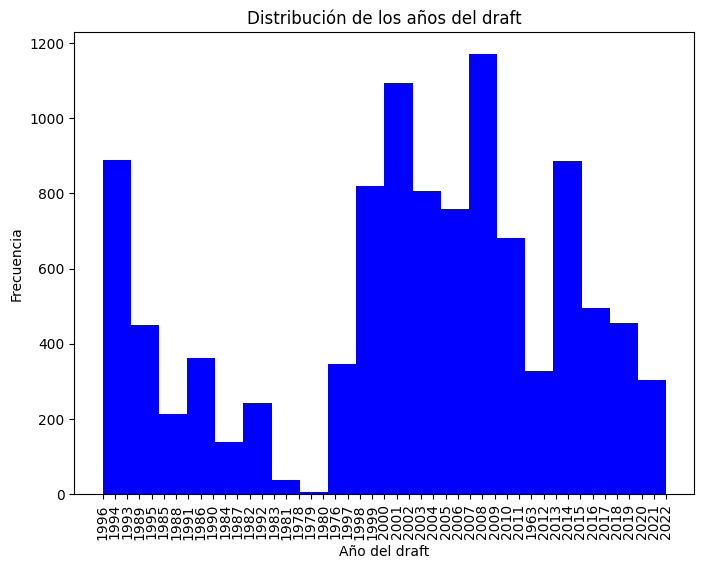

In [76]:
plt.figure(figsize=(8, 6))
plt.hist(df_filtro['draft_year'], bins=20, color='blue')
plt.xlabel('Año del draft')
plt.ylabel('Frecuencia')
plt.title('Distribución de los años del draft')
plt.xticks(rotation=90)  # Rotación del texto en el eje x

plt.show()

2. Vamos a realizar un diagrama de barras para ver que % hay por pais

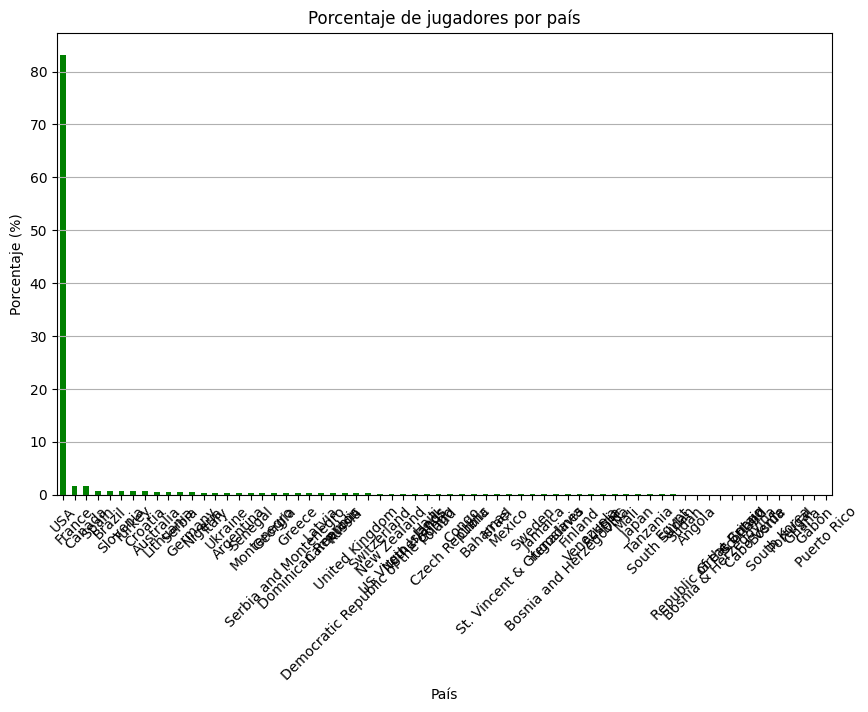

In [77]:
cuentapais = df_filtro['country'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
cuentapais.plot(kind='bar', color='green')
plt.xlabel('País')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de jugadores por país')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

3. histograma con player height. para analizar la altura de los jugadores`

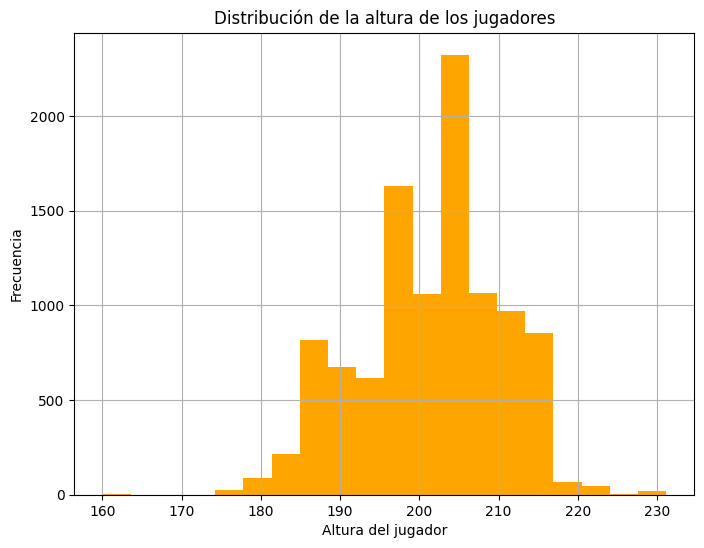

In [78]:
plt.figure(figsize=(8, 6))
plt.hist(df_filtro['player_height'], bins=20, color='orange')
plt.xlabel('Altura del jugador')
plt.ylabel('Frecuencia')
plt.title('Distribución de la altura de los jugadores')
plt.grid(True)
plt.show()

4. histograma con player weight. para analizar el peso de los jugadores


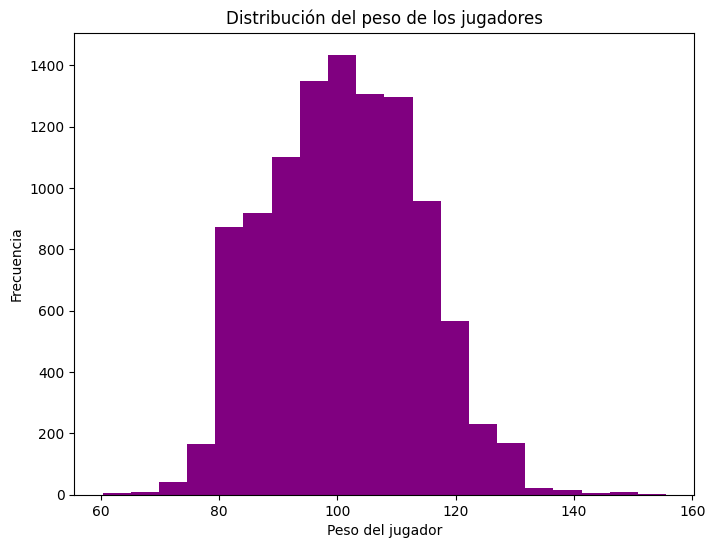

In [80]:
plt.figure(figsize=(8, 6))
plt.hist(df_filtro['player_weight'], bins=20, color='purple')
plt.xlabel('Peso del jugador')
plt.ylabel('Frecuencia')
plt.title('Distribución del peso de los jugadores')
plt.show()

5. Vamos a hacer un grafico de correlacion entre edad y peso para ver si a mayor edad mayor peso o viceversa.

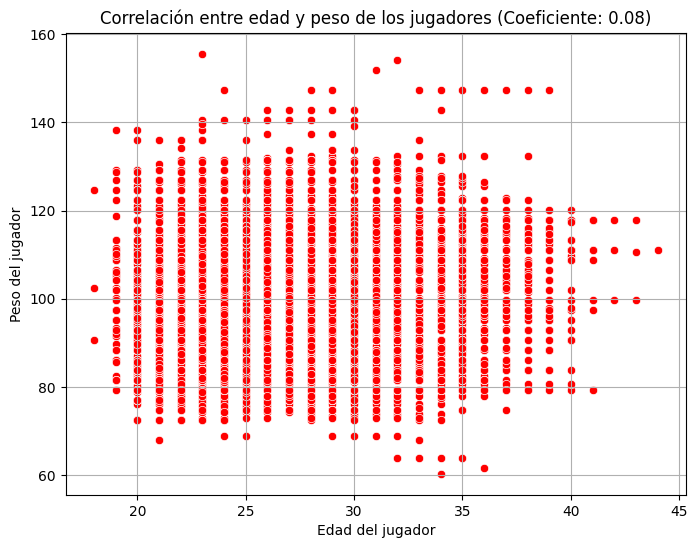

In [82]:
correlation = df_filtro['age'].corr(df_filtro['player_weight'])

# Gráfico de dispersión para la correlación entre 'age' y 'player_weight'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtro, x='age', y='player_weight', color='red')
plt.xlabel('Edad del jugador')
plt.ylabel('Peso del jugador')
plt.title(f'Correlación entre edad y peso de los jugadores (Coeficiente: {correlation:.2f})')
plt.grid(True)
plt.show()

# Solución punto 3

In [ ]:
!pip install librosa matplotlib

import librosa
import librosa.display
import matplotlib.pyplot as plt

In [86]:
from google.colab import files

uploaded = files.upload()

Audio 1 tigre:

In [102]:
audio_tigre = 'mixkit-big-wild-cat-slow-moan-90.wav'
audio, sr = librosa.load(audio_tigre)


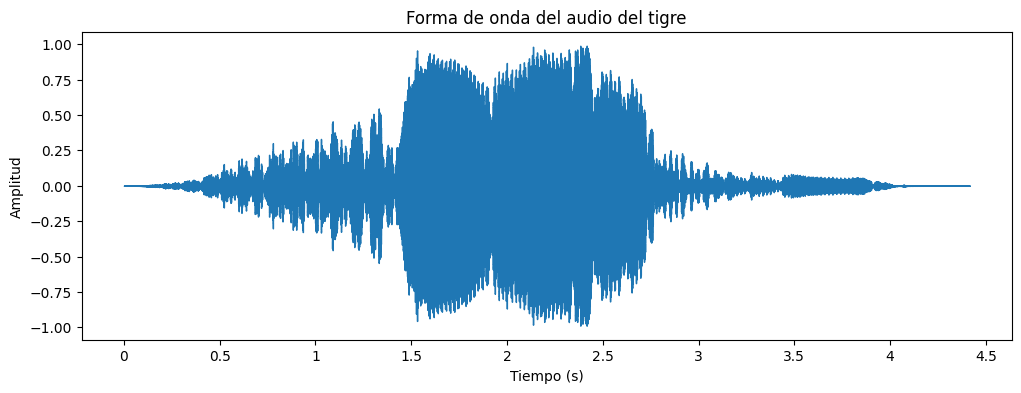

In [103]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio, sr=sr)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Forma de onda del audio del tigre')
plt.show()

audio 2 vaca

In [104]:
audio_vaca = 'mixkit-cow-moo-in-the-barn-1751.wav'
audio2, sr = librosa.load(audio_vaca)

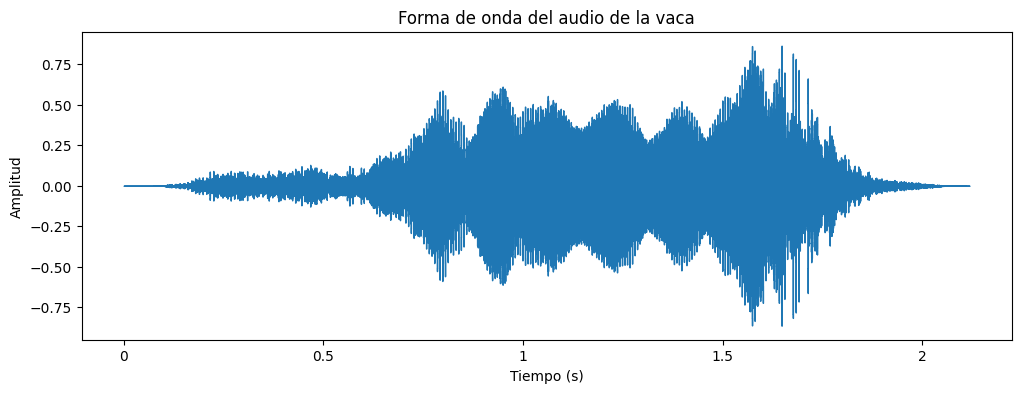

In [105]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio2, sr=sr)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Forma de onda del audio de la vaca')
plt.show()

Audio 3 Granja

In [92]:
audio_vgranja = 'mixkit-farm-animals-in-the-morning-7.wav'
audio3, sr = librosa.load(audio_vgranja)

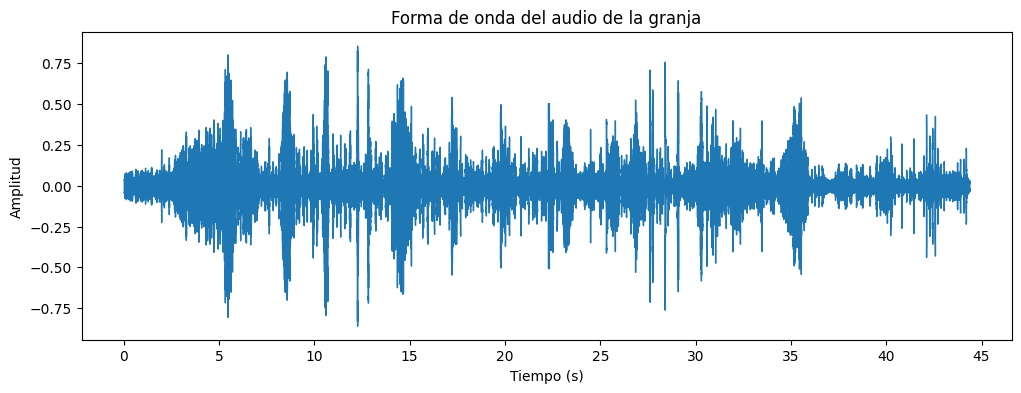

In [93]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio3, sr=sr)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Forma de onda del audio de la granja')
plt.show()

Combinar los 3 graficos:

In [95]:
audio_files = ['mixkit-cow-moo-in-the-barn-1751.wav', 'mixkit-big-wild-cat-slow-moan-90.wav', 'mixkit-farm-animals-in-the-morning-7.wav']

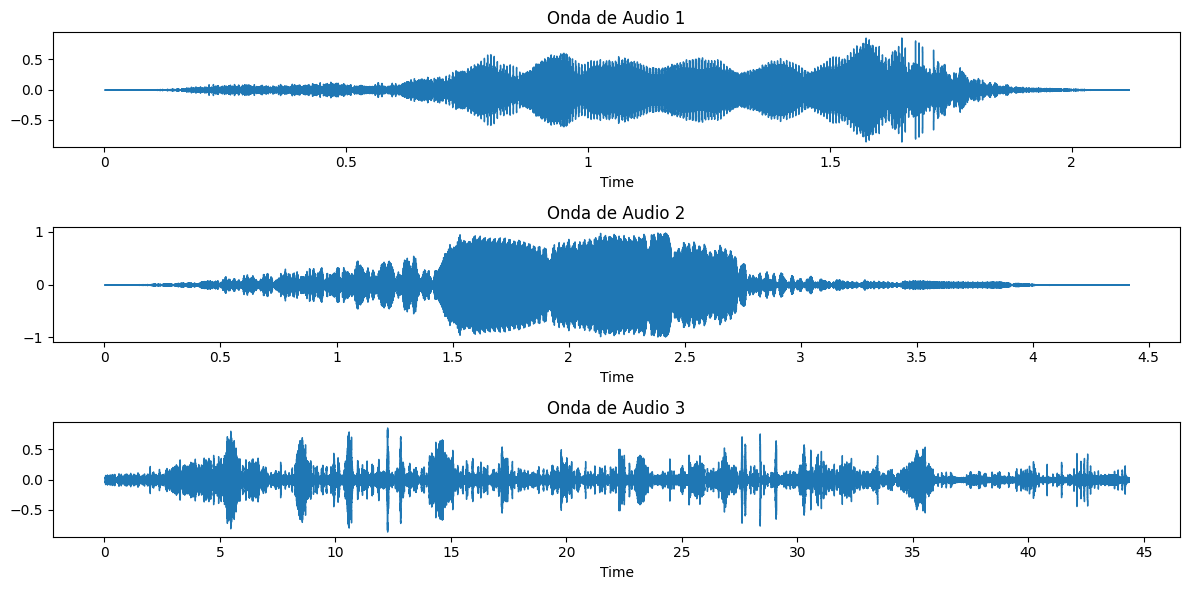

In [96]:
plt.figure(figsize=(12, 6))

for i, file in enumerate(audio_files, 1):
    audio, sr = librosa.load(file)

    plt.subplot(len(audio_files), 1, i)
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f'Onda de Audio {i}')

plt.tight_layout()
plt.show()

Espectograma:

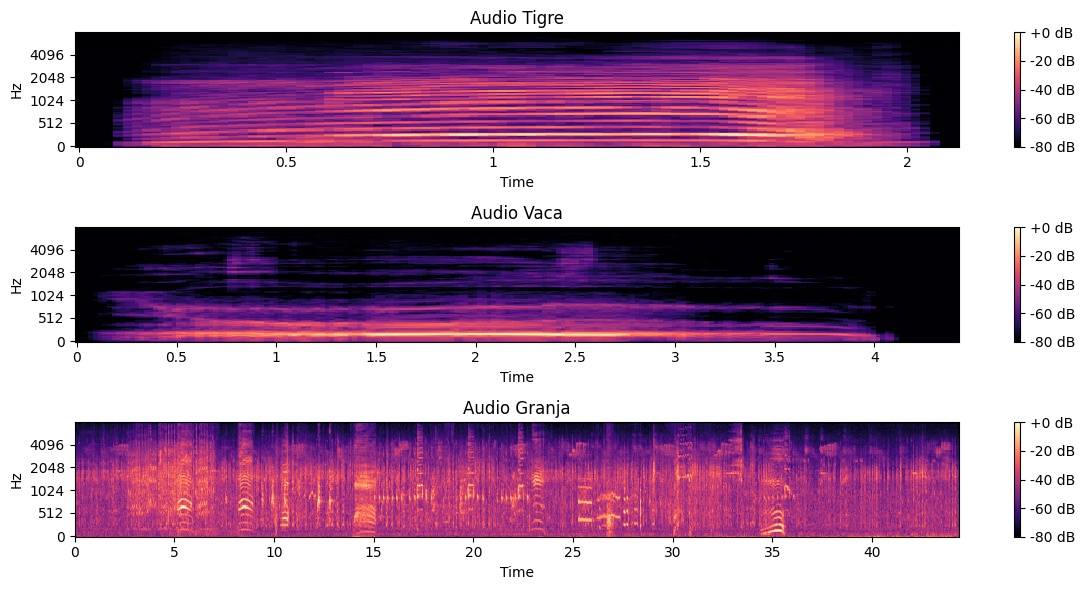

In [100]:
plt.figure(figsize=(12, 6))

for i, file in enumerate(audio_files, 1):
    audio, sr = librosa.load(file)

    S = librosa.feature.melspectrogram(y=audio, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.subplot(len(audio_files), 1, i)
    librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    if i == 1:
        plt.title('Audio Vaca')
    elif i == 2:
        plt.title('Audio Tigre')
    elif i == 3:
        plt.title('Audio Granja')

plt.tight_layout()
plt.show()